## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 68 (delta 24), reused 27 (delta 12), pack-reused 23 (from 1)
Receiving objects: 100% (68/68), 13.58 MiB | 11.40 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [2]:
# Importing relavant packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.metrics import mean_squared_error

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [3]:
# 1.
path = './knn/data/USA_cars_datasets.csv' # Pulling the cars data
df = pd.read_csv(path, low_memory=False) # Creating an cars dataframe

In [4]:
# Removing all but the price, year, and mileage variables:
df = df[['price', 'year', 'mileage']]

# Checking for any NANs in the df (there are none):
print(df.isna().sum(), '\n')

# Checking any null values in the df (there are none):
print(df.isnull().sum(), '\n')

# Seeing the dimensions of the dataframe (2499 x 3):
print(df.shape)

price      0
year       0
mileage    0
dtype: int64 

price      0
year       0
mileage    0
dtype: int64 

(2499, 3)


In [5]:
# Taking a preliminary look at the data:
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
# 2.
# Max/min normalizing the year and mileage variables:
df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

In [ ]:
# 3.
y = df['price'] # Creating atarget variable vector (what we're predicting)
X = df.loc[:,['year','mileage']] # Creating a feature matrix (predictors)

# Splitting the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

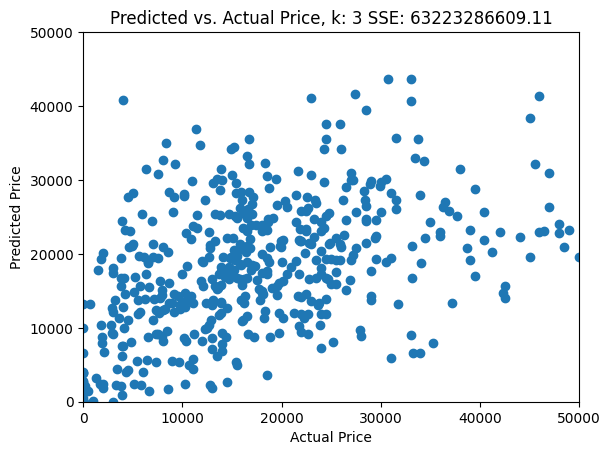

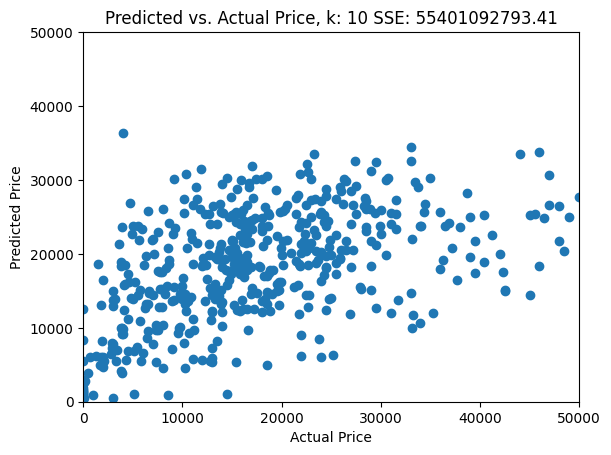

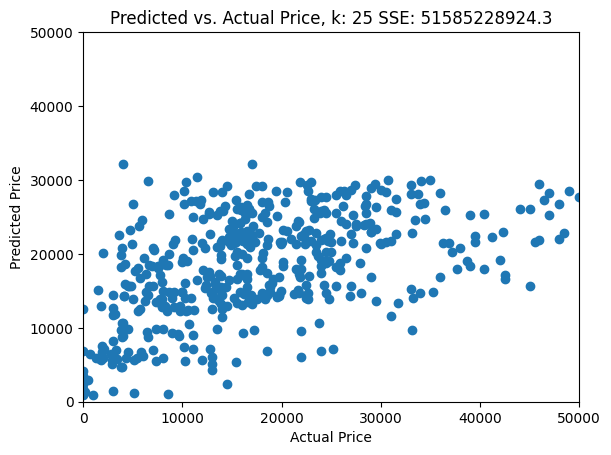

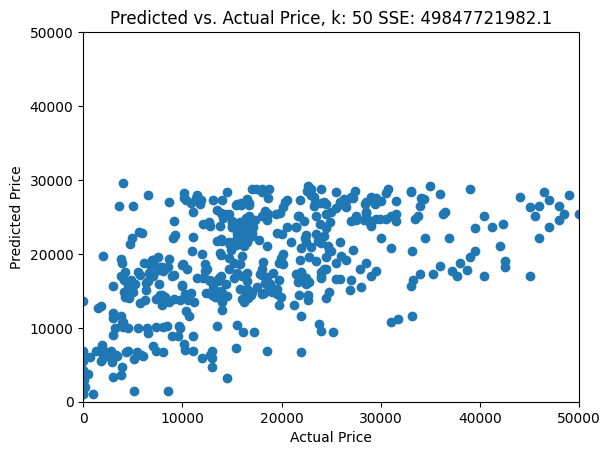

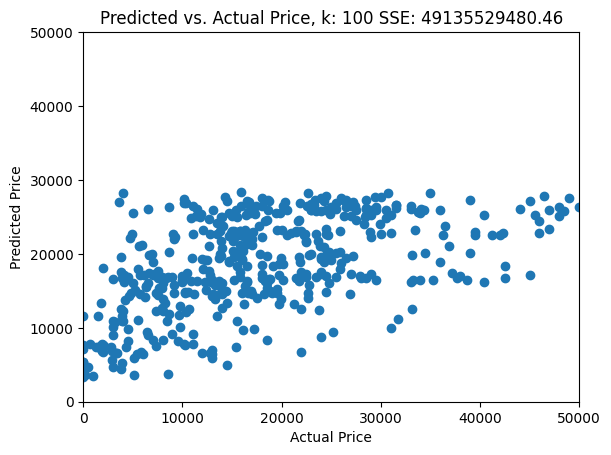

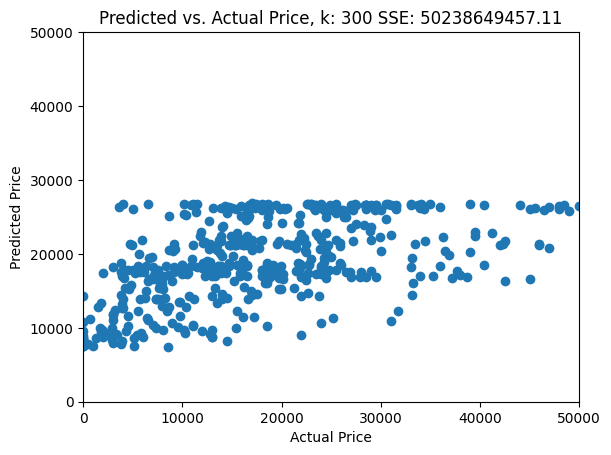

In [ ]:
# 4.

k_values = [3, 10, 25, 50, 100, 300] # List of k's to try

for k in k_values:
  model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train)  # Train the model on our data

  y_hat = fitted_model.predict(X_test)  # Predict values for test set
  SSE = np.sum( (y_test-y_hat)**2 )     # Save the computed SSE for test set

  fig, axes = plt.subplots()
  plt.scatter(y_test,y_hat)

  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  SSE = round(SSE,2)  # Rounding SSE to the hundredths place
  plt.title('Predicted vs. Actual Price, k: ' + str(k) + ' SSE: ' + str(SSE))
  plt.xlim(0,50000)
  plt.ylim(0,50000)
  plt.show()



In [ ]:
# Over the course of the k-values the SSE decreases by about 15%.
#  The spread of the data also seems to decrease noticeably.

In [ ]:
# 5.
k_bar = 200 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data

    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[77]


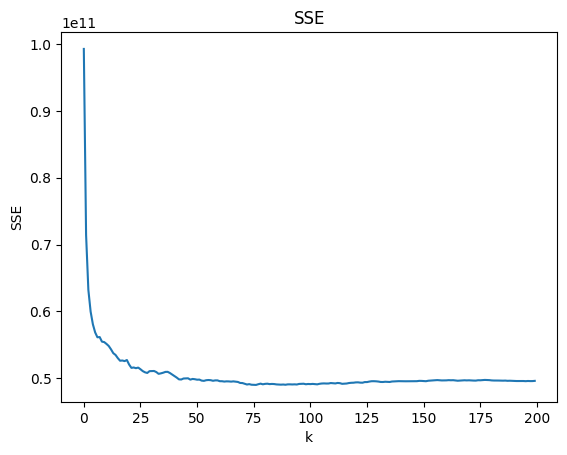

In [ ]:
# Plotting the k-values:

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

In [ ]:
# The optimal k-value is 77

In [ ]:
# 6.
# The model is definitely underfitted at smaller (k<77) values. This
#  can be seen in a wide spread in the predicted price without
#  much correlation to the actual price. At k=100, which is closest
#  to the optimal k of 77, the model is at its most accurate with a
#  its lowest SSE. Past k=100 we start to see some overfitting and
#  the model stops behaving naturally. This is most noticeable at
#  the horizontal(ish) line that forms when the predicted price
#  hits ~29k. There's no reason for prices to behave like this
#  in real life, so it's a clear indicator of overfitting.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [21]:
# 1.
path = './knn/data/heart_failure_clinical_records_dataset.csv' # Pulling the records data
df = pd.read_csv(path, low_memory=False) # Creating a records dataframe

In [22]:
# Removing the time variable from the dataframe:
df = df.drop(columns=['time'])

# Checking for any NANs in the df (there are none):
print(df.isna().sum(), '\n')

# Checking any null values in the df (there are none):
print(df.isnull().sum(), '\n')

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64 



In [23]:
# Taking a preliminary look at the data:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [24]:
# 2.
# Making a correlation matrix:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [25]:
# Interestingly, there seems to be a reasonably high correlation between
#  sex and smoking. Age and death event are also correlelated higher
#  than other variables. Death event is also correlated with serum
#. creatinine, ejection fraction, and serum sodium.

In [27]:
# 3.
# Creating the tables using the .describe() command:
print(df.loc[:,['anaemia','DEATH_EVENT']].groupby('anaemia').describe(),'\n')
print(df.loc[:,['diabetes','DEATH_EVENT']].groupby('diabetes').describe(),'\n')
print(df.loc[:,['high_blood_pressure','DEATH_EVENT']].groupby('high_blood_pressure').describe,'\n')
print(df.loc[:,['sex','DEATH_EVENT']].groupby('sex').describe(),'\n')
print(df.loc[:,['smoking','DEATH_EVENT']].groupby('smoking').describe(),'\n')

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0 

         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0 

<bound method GroupBy.describe of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7ef08df076d0>> 

    DEATH_EVENT                                             
          count      mean       std  min  25%  50%  75%  max
sex                                                         
0         105.0  0.323810  0.470173  0.0  0.0  0.

In [ ]:
# There is a higher proportion of death events for anaemia as well
#  as for high blood pressure. This can be seen in the larger mean
#  values corresponding to 1 for those variables. Interestingly, the
#  mean for people who do and don't smoke seems to be about the same.

In [29]:
# 4.
# Creating a matrix of Death Event, anemia, and high blood pressure:
y = df['DEATH_EVENT']
X = df.loc[:,['anaemia','high_blood_pressure']]

In [35]:
# 5.
# Max/min normalizing the variable X:
X = (X - X.min()) / (X.max() - X.min())

In [36]:
# 6.
# Splitting the data between trained and untrained:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

In [37]:
# 7.
k_bar = 200 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data

    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[40]


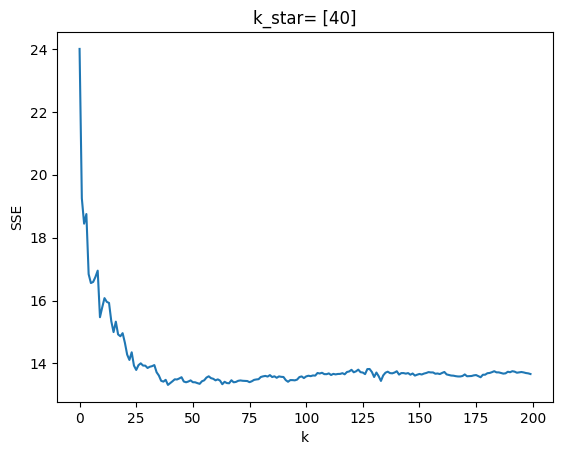

In [39]:
# Plotting the k-values:

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('k_star= ' + str(k_star))
plt.show()

In [40]:
# The optimal k-value seems to be 40.